### GloVe (Global Vectors)

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

GloVe algorithm is a powerful tool for creating word glove embeddings, which are numerical representations of the meanings of words. The GloVe algorithm uses a co-occurrence matrix to learn the relationships between words, and it can be trained on large datasets to learn rich and accurate embeddings.

In the context of a GRU network, word embeddings are often used as the input to the network. The embeddings capture the semantic meaning of the words in a numerical format that the network can easily process. These embeddings are typically pre-trained using a method like GloVe and are then used as input to the GRU network, which is trained on the specific task.

#### Using Pre-Trained models

Using pre-trained word embeddings can improve the performance of a GRU network because the embeddings already capture a lot of the meaning and context of the words in the dataset. Additionally, pre-trained embeddings can significantly reduce the data and computational resources needed to train the GRU network.

It's worth noting that other techniques like word2vec, and fasttext also can be used to get word embeddings. And now, with the state-of-the-art transformer-based models, like BERT, RoBERTa, or ALBERT, which provide contextualized word embeddings, these are very useful in NLP tasks.

To download pre-trained word vectors for GloVe (short for Global Vectors), you can visit the GloVe website and select the desired word vector model from the available options. These options may include different sizes of word vectors (e.g., 50, 100, 200, 300 dimensions) and different training corpora (e.g., Wikipedia, Common Crawl).

Once you have selected the desired word vector model, you can download and use the file in your NLP project. Unzip the file and load the word vectors into your program using a library such as gensim or TensorFlow.

#### Create a Vocabulary Dictionary

Creating a vocabulary dictionary in the GloVe algorithm involves preprocessing the training dataset to identify all the unique words or tokens in the data. Creating the vocabulary dictionary typically involves tokenizing the dataset into individual words, counting the frequency of each word, and then arranging the words in decreasing order of frequency. High-frequency words are usually included at the start of the dictionary, while low-frequency words are placed towards the end. Once the vocabulary dictionary is created, we can filter out infrequent or stop words.

Additionally, this dictionary is used to create a sparse word-word co-occurrence matrix which is used as input to the GloVe algorithm to learn glove embeddings. In this matrix, rows and columns are the words of the dictionary. This matrix captures the co-occurrences of words in a window (usually a fixed size, such as five words) in the corpus. By creating this matrix, the GloVe algorithm can efficiently learn the relationships between words in the dataset, which are important to create word embeddings.

In [9]:
import nltk
# nltk.download('punkt')
from collections import Counter

# Sample dataset
text = "This is a simple example of creating a vocabulary dictionary. The GloVe algorithm is a powerful method for creating word glove embeddings and is widely used in natural language processing tasks. A vocabulary dictionary is an important step in the GloVe algorithm."

# Tokenize the text
tokens = nltk.word_tokenize(text)

# Count the frequency of each word
word_counts = Counter(tokens)

# Arrange the words in decreasing order of frequency
sorted_vocab = sorted(word_counts, key=word_counts.get, reverse=True)

# # set threshold and filter out infrequent words
# threshold = 2
# filtered_vocab = [word for word in sorted_vocab if word_counts[word] > threshold]

# create the vocabulary dictionary
vocab_dictionary = {word: i+1 for i, word in enumerate(filtered_vocab)}

#printing the dictionary
print(vocab_dictionary)

#### This process will be done on much larger datasets in a real-world scenario.

{'is': 1, 'a': 2, '.': 3, 'creating': 4, 'vocabulary': 5, 'dictionary': 6, 'GloVe': 7, 'algorithm': 8, 'in': 9, 'This': 10, 'simple': 11, 'example': 12, 'of': 13, 'The': 14, 'powerful': 15, 'method': 16, 'for': 17, 'word': 18, 'glove': 19, 'embeddings': 20, 'and': 21, 'widely': 22, 'used': 23, 'natural': 24, 'language': 25, 'processing': 26, 'tasks': 27, 'A': 28, 'an': 29, 'important': 30, 'step': 31, 'the': 32}


## To generate glove embeddings using the GloVe algorithm, you will need to follow these steps:

    Collect a large datasetof words and their co-oc currences. This can be a text corpus, such as documents or web pages.
    
    Preprocess the dataset by tokenizing the text into individual words and filtering out rare or irrelevant words.
    
    Construct a co-occurrence matrix that counts the number of times each word appears in the same context as every other word.
    
    Use the co-occurrence matrix to compute the word embeddings using the GloVe algorithm. This involves training a model to minimize the error between the word vectors' dot product and the co-occurrence counts' logarithm.
    
    Save the resulting word embeddings to a file or use them directly in your model.

In [2]:
!python -m wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove*.zip


Saved under glove.6B.zip


The below code loads pre-trained GloVe word vectors into a python dictionary where the keys are words, and values are vectors. It reads the file line by line, then assigns the first element as the word and the rest as the vector. The vector is then added to the 'vocab' dictionary. 

In [ ]:
import numpy as np
vocab = {}
with open('glove.6B.100d.txt', 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        vocab[word] = vec
print(f'Loaded {len(vocab)} word vectors')

The linguistic or semantic similarity of the matching words can be determined using the Euclidean distance (or cosine similarity) between two-word vectors. This statistic occasionally reveals uncommon but significant words outside the ordinary person's vocabulary.

In [ ]:
## To find the nearest neighbors of a word
def find_nearest(word, vocab, k=5):
    distances = []
    word_vec = vocab[word]
    for w, vec in vocab.items():
    distance = np.linalg.norm(word_vec - vec)
    distances.append((w, distance))
    distances = sorted(distances, key=lambda x: x[1])
    return distances[:k]

print(find_nearest('cat', vocab))

#### Here are the general steps to train a GloVe model:

**Prepare the training corpus:**
The first step is to prepare a large corpus of text that we will use to train the GloVe model. This corpus should be representative of the text that the model will be used on.

**Tokenize the corpus:**
The next step is to tokenize the text in the corpus. Tokenization is the process of breaking the text into individual words or tokens. This step is necessary because we will train the GloVe model on individual words.

**Create the word-word co-occurrence matrix:**
Once the text is tokenized, the next step is to create a word-word co-occurrence matrix. This matrix tracks how frequently words occur alongside one another in the corpus. The matrix is typically sparse, which means that most entries are zero.

**Collect co-occurrence statistics:**
This step is the most computationally expensive part of the process because the algorithm goes through the whole corpus once to collect the statistics for the matrix; however, this step is only required once.

**Train the GloVe model:**
Once the co-occurrence statistics are collected, we can start training. The GloVe algorithm learns the word vectors by solving an optimization problem on the co-occurrence matrix. This process is done iteratively, adjusting the vectors after each iteration until it reaches a satisfactory solution.

**Use the trained model:**
Once the model is trained, we can use it for various natural languages processing tasks such as text classification, information retrieval, and language translation.

#### Model Overview

A weighted least-squares objective log-bilinear model is what GloVe is. The basic finding is that ratios of word-to-word co-occurrence probabilities used to encode some meaning are the main intuition behind the model. Consider, for instance, the likelihood that the vocabulary terms ice and steam will occur together with different probing words. Here are some precise probabilities drawn from a corpus of 6 billion words:

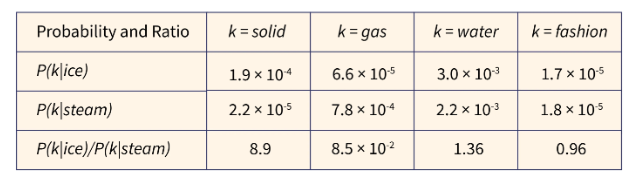

`The GloVe algorithm is designed to create word embeddings, or numerical representations of the meanings of words, by analyzing the co-occurrence of words in a corpus. The algorithm uses a co-occurrence matrix to learn the relationships between words, where the values in the matrix represent the probabilities of the words occurring together.`

`The training goal of the algorithm is to acquire word vectors whose dot product equals the logarithm of the probability of the words occurring together. This links the logarithm of ratios of co-occurrence probability with vector differences in the word vector space and helps the word vectors excel at word analogy tasks like those studied by the word2vec algorithm.`